# Predicting Amazon's Stock Price Using Economic Indicators and Commodity Prices

## Introduction

### In this project, we aim to develop a predictive model for Amazon's stock price by leveraging various economic indicators, commodity prices, and stock prices of major technology companies. The dataset, Stock_Market_Dataset.csv, contains historical data on:

### Commodities: Natural gas, crude oil, copper, gold, silver, and platinum prices and their trading volumes.
### Cryptocurrencies: Bitcoin and Ethereum prices and volumes.
### Stock Market Indices: S&P 500 and Nasdaq 100 indices.
### Technology Stocks: Prices and volumes of Apple, Tesla, Microsoft, Google, Nvidia, Berkshire Hathaway, Netflix, Amazon, and Meta (formerly Facebook).

## Objective:

### The primary goal is to analyze how these diverse financial instruments correlate with Amazon's stock price and to build a regression model that can predict future prices based on these indicators. By understanding these relationships, we can gain insights into market dynamics and potentially improve investment strategies.

## Approach:

## Data Exploration and Preprocessing:

### Data Loading: Import the dataset and display initial entries to understand its structure.
### Data Cleaning: Handle missing values by filling them with mean values and convert non-numerical columns to numerical by removing commas and changing data types.
### Feature Selection: Identify relevant features that may influence Amazon's stock price.

## Exploratory Data Analysis (EDA):

### Visualization: Create histograms and scatter plots to understand the distribution of Amazon's stock price and its relationship with selected features.
### Correlation Analysis: Generate a heatmap to visualize correlations between variables.

## Model Development:

### Data Splitting: Divide the dataset into training and testing sets using an 80/20 split.
### Feature Scaling: Standardize the features to ensure they contribute equally to the model's learning process.
### Model Training: Use a Linear Regression model to learn from the training data.
### Model Evaluation: Assess the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

## Cross-Validation and Refinement:

### Cross-Validation: Perform k-fold cross-validation to evaluate the model's robustness.
### Feature Importance: Analyze the coefficients of the linear regression model to determine the impact of each feature on Amazon's stock price.

## Significance:

### Understanding the factors that influence Amazon's stock price can provide valuable insights for investors, analysts, and stakeholders. By incorporating a variety of economic indicators and commodity prices, this model attempts to capture the complex interplay between different market forces and Amazon's market valuation.

## Technologies Used:

### Python Libraries: pandas, numpy for data manipulation; matplotlib, seaborn for visualization; scikit-learn for modeling and evaluation.


# --------------------------------------------------------------------------------------------------------

## Import Libraries and Load Data
### Import the Pandas library for data manipulation.
### Load the dataset Stock_Market_Dataset.csv into a DataFrame called data.
### Display the first five rows to get an initial understanding of the dataset.

In [68]:
#import Lib
import pandas as pd

#Load the Data
data=pd.read_csv("Stock_Market_Dataset.csv")

#show first 5 lines
print(data.head())

   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...        5,89,498         10580.0      

## Check Data Types and Statistical Summary
### Use data.info() to check the data types and non-null counts of each column.
### Use data.describe() to get statistical summaries of numerical columns, such as mean, standard deviation, and quartile values.

In [69]:
# Checking data types
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

## Handle Missing Values
### Identify columns with missing values by summing the null entries in each column.
### Fill missing numerical values with the mean of their respective columns to prepare the data for analysis.

## Investigate Non-Numerical Columns
### Select columns with data type object to find non-numerical columns that may need conversion.
### Display the first few entries of these columns to understand why they are not numerical (e.g., presence of commas or special characters).


In [70]:
# checking null data and filling values with mean 
print(data.isnull().sum())
data=data.fillna(data.mean())


# Check the columns that have object types
ob_data=data.select_dtypes(include=['object']).columns

# Display the first few entries of these object columns to understand why they are not numerical
data_ob=data[ob_data].head()
ob_data,data_ob


Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64


(Index(['Date', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price',
        'S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price'],
       dtype='object'),
          Date Bitcoin_Price Platinum_Price Ethereum_Price S&P_500_Price  \
 0  02-02-2024     43,194.70          901.6       2,309.28      4,958.61   
 1  01-02-2024     43,081.40          922.3       2,304.28      4,906.19   
 2  31-01-2024     42,580.50          932.6       2,283.14      4,848.87   
 3  30-01-2024     42,946.20          931.7       2,343.11      4,924.97   
 4  29-01-2024     43,299.80          938.3       2,317.79      4,927.93   
 
   Nasdaq_100_Price Berkshire_Price Gold_Price  
 0        17,642.73        5,89,498   2,053.70  
 1        17,344.71        5,81,600   2,071.10  
 2        17,137.24        5,78,020   2,067.40  
 3        17,476.71        5,84,680   2,050.90  
 4        17,596.27        5,78,800   2,034.90  )

## Convert Object Columns to Numerical
### Define a list of columns that contain numerical values stored as strings with commas.
### Remove commas and convert these columns to numeric data types using pd.to_numeric.
### Verify the data types to ensure the conversion was successful.

In [71]:
# removing comma from objects
comm_data=['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price','S&P_500_Price','Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

for cod in comm_data:
    data[cod]=pd.to_numeric(data[cod].str.replace(',',''),errors='coerce')

cd=data[comm_data].dtypes
cd,comm_data

(Bitcoin_Price       float64
 Platinum_Price      float64
 Ethereum_Price      float64
 S&P_500_Price       float64
 Nasdaq_100_Price    float64
 Berkshire_Price       int64
 Gold_Price          float64
 dtype: object,
 ['Bitcoin_Price',
  'Platinum_Price',
  'Ethereum_Price',
  'S&P_500_Price',
  'Nasdaq_100_Price',
  'Berkshire_Price',
  'Gold_Price'])

## Visualize the Distribution of Amazon Prices
### Import Matplotlib and Seaborn libraries for data visualization.
### Plot a histogram of the Amazon_Price column to understand its distribution and identify any patterns or anomalies.

## Scatter Plots of Amazon Price vs. Key Features
### Create scatter plots to visualize the relationship between Amazon_Price and selected features.
### This helps in identifying any linear or non-linear relationships that could be important for modeling.

## Correlation Matrix Heatmap
### Plot a heatmap of the correlation matrix to visualize the pairwise correlations between numerical features.
### This aids in identifying multicollinearity and selecting relevant features for the model.


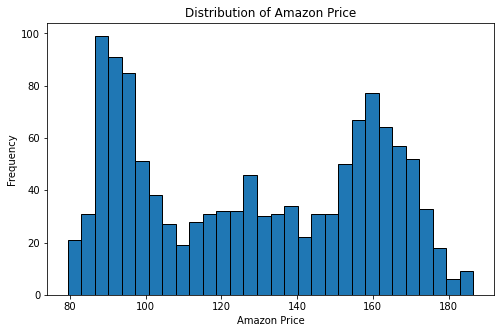

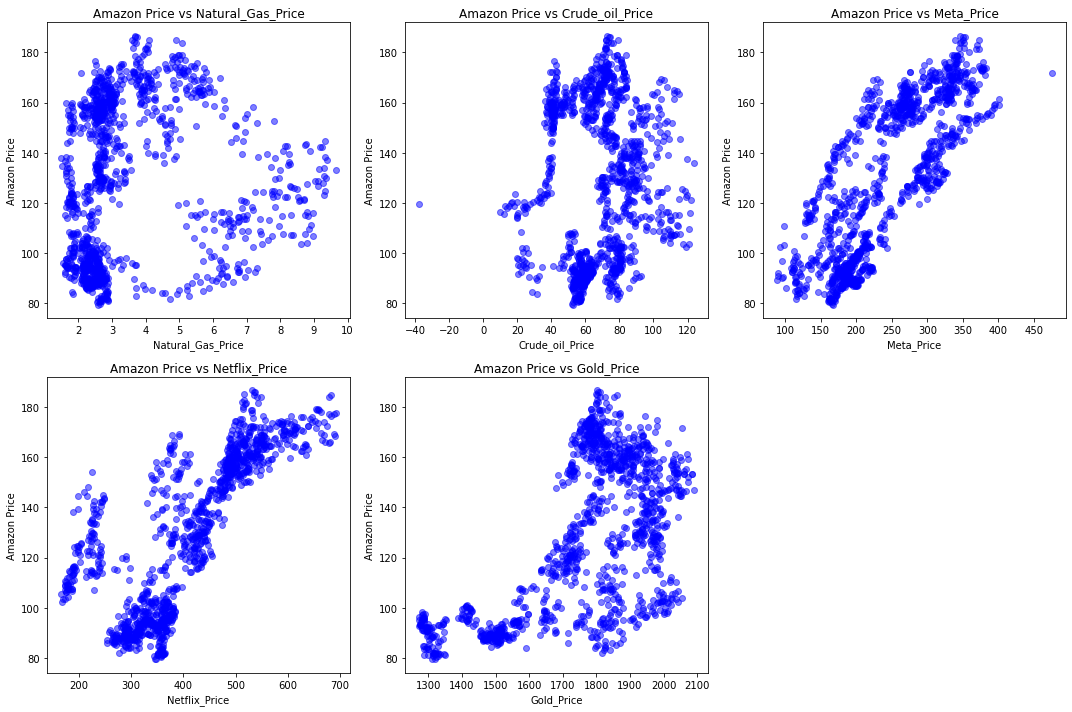

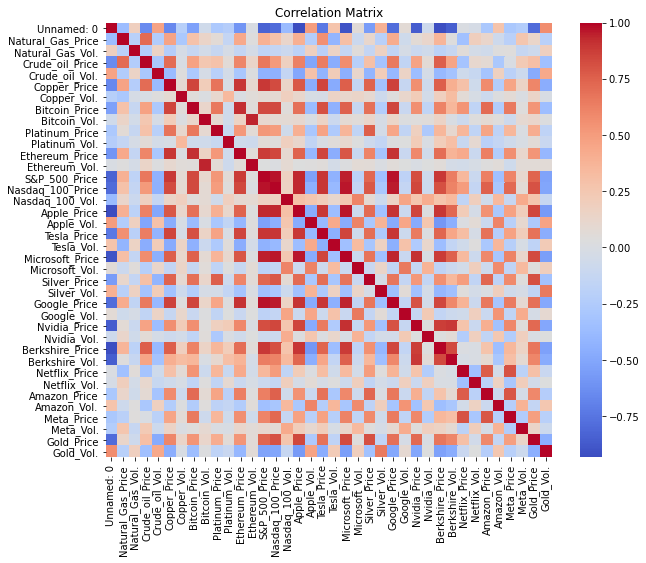

In [72]:
#importing matplotlib ans seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# ploting Histogram of Amazon Price
plt.figure(figsize=(8,5))
plt.hist(data['Amazon_Price'],bins=30,edgecolor='black')
plt.title('Distribution of Amazon Price')
plt.xlabel('Amazon Price')
plt.ylabel('Frequency')
plt.show()

# plotting scatter plot with some key features 
rel_features = ['Natural_Gas_Price', 'Crude_oil_Price','Meta_Price','Netflix_Price', 'Gold_Price']
plt.figure(figsize=(15,10))
for i, feature in enumerate(rel_features, 1):
    plt.subplot(2, 3, i) if i <= len(rel_features) else plt.axis('off')
    plt.scatter(data[feature],data['Amazon_Price'],color='blue',alpha=0.5)
    plt.title(f'Amazon Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Amazon Price')
plt.tight_layout()
plt.show()
    
    
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot= False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Prepare Features and Target Variable
### Import necessary libraries for model training and evaluation.
### Select relevant features and the target variable (Amazon_Price) for the predictive model.
### Display the first few rows of the features to confirm selection.

In [73]:
# Prepare Features and Target Variable

features= data[['Natural_Gas_Price', 'Crude_oil_Price','Meta_Price','Netflix_Price', 'Gold_Price']]
target=data['Amazon_Price']

print(features.head())

   Natural_Gas_Price  Crude_oil_Price  Meta_Price  Netflix_Price  Gold_Price
0              2.079            72.28      474.99         564.64      2053.7
1              2.050            73.82      394.78         567.51      2071.1
2              2.100            75.85      390.14         564.11      2067.4
3              2.077            77.82      400.06         562.85      2050.9
4              2.490            76.78      401.02         575.79      2034.9


## Standardize Features
### Use StandardScaler to standardize the features, which scales the data to have a mean of 0 and a standard deviation of 1.
### Standardization is important for algorithms that are sensitive to the scale of the data.

In [74]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
sfeatures=scaler.fit_transform(features.values)
sfeatures

array([[-0.77709343,  0.22989076,  3.314161  ,  1.39025577,  1.44924415],
       [-0.79301169,  0.30516963,  2.18423349,  1.41522462,  1.53488372],
       [-0.76556641,  0.40440088,  2.11886928,  1.3856448 ,  1.516673  ],
       ...,
       [-0.45708152, -0.66319045, -0.97536556, -0.4580483 , -2.1894529 ],
       [-0.45708152, -0.68029928, -0.96592719, -0.42655449, -2.16582819],
       [-0.45817933, -0.63630514, -0.99283358, -0.46544326, -2.16533601]])

## Split Data into Training and Testing Sets
### Split the standardized data into training and testing sets using an 80/20 split.
### This allows for training the model on one set of data and evaluating its performance on unseen data.

In [75]:
# Splitiing Data into 80/20
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(sfeatures,target,test_size =0.2)

## Train Linear Regression Model
### Import the LinearRegression model and evaluation metrics from Scikit-Learn.
### Instantiate and train the linear regression model using the training data.

In [76]:
#importing lib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np


#creating LinearRegression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Make Predictions and Evaluate the Model
### Use the trained model to make predictions on the test set.
### Evaluate the model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [77]:
# predict on test data
pred=model.predict(x_test)

# evaluate model using MAE,MSE,RMSE
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)

# score
mae,mse,rmse

(7.982947438363693, 108.3958406640273, 10.411332319354104)

## Cross-Validation
### Perform 5-fold cross-validation to assess the model's generalization ability.
### Calculate the mean and standard deviation of the negative mean squared errors to understand model variability.

In [78]:
#import Lib
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(model,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
cvs_mean=np.mean(np.abs(cvs))
cvs_std=np.std(cvs)

cvs,cvs_mean,cvs_std

(array([-108.46437413, -129.69461249, -148.85808789, -137.2346814 ,
        -131.22424288]),
 131.09519975823648,
 13.17077062986831)

## Additional Model Evaluation on Unseen Data
### Further split the test set to simulate completely unseen data.
### Evaluate the model on this subset to get an additional estimate of its performance.

In [79]:
#splitting unseen data
x_rec, x_final_test, y_rec, y_final_test = train_test_split(x_test, y_test, test_size=0.5)
r_pred=model.predict(x_rec)

# Evaluate on unseen data
r_mae=mean_absolute_error(y_rec,r_pred)
r_rmse=np.sqrt(mean_squared_error(y_rec,r_pred))

#score
r_mae,r_rmse

(8.593799030259538, 10.852496130387525)

## Analyze Model Coefficients
### Create a DataFrame to display the coefficients of the linear regression model.
### Plot the coefficients to visualize the importance of each feature in predicting Amazon_Price.

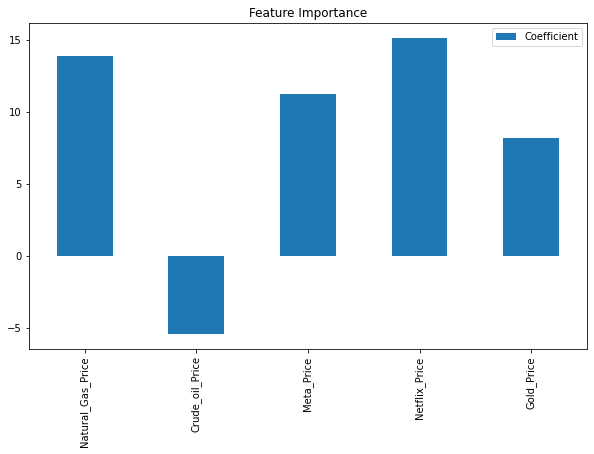

,Coefficient
Natural_Gas_Price,13.848947
Crude_oil_Price,-5.436127
Meta_Price,11.242248
Netflix_Price,15.141898
Gold_Price,8.164431


In [80]:
#Analyze the coefficients for feature importance
coef = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])

# Plot the coefficients as a bar plot
coef.plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.show()
coef